In [1]:
#necessary imports
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, plot_roc_curve, accuracy_score,recall_score
from sklearn.feature_selection import RFE
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline


In [2]:
data1 = pd.read_csv('https://raw.githubusercontent.com/BasiaSDA/projekt-klasyfikacja/main/df1.csv')
data2 = pd.read_csv('https://raw.githubusercontent.com/BasiaSDA/projekt-klasyfikacja/main/df2.csv')
df=data1.merge(data2)

Exploratory Data Analysis and Data Cleaning

In [3]:
#how many nans are in dataset
pd.DataFrame(df.isnull().sum())

,0
EmployeeNumber,0
Age,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EnvironmentSatisfaction,0


In [4]:
#checking the features 
df.iloc[:,:20].describe()

,EmployeeNumber,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked
count,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.0,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000
mean,7956.865588,416.187458,801.017982,33339.433356,2.909867,1.0,2.719263,65.977073,2.739492,2.053495,2.724882,6468.496067,14276.196898,2.681726
std,17226.922333,1566.205147,405.605362,145352.131423,1.025184,0.0,1.093263,20.277369,0.712660,1.102979,1.107453,4682.905422,7149.079135,2.487077
min,1.000000,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000
25%,1735.000000,31.000000,458.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,1.000000,2.000000,2899.000000,7973.000000,1.000000
50%,5902.000000,36.000000,804.000000,8.000000,3.000000,1.0,3.000000,66.000000,3.000000,2.000000,3.000000,4876.000000,14218.000000,2.000000
75%,7014.000000,45.000000,1162.000000,17.000000,4.000000,1.0,4.000000,84.000000,3.000000,3.000000,4.000000,8346.000000,20471.000000,4.000000
max,100146.000000,9890.000000,1499.000000,999590.000000,5.000000,1.0,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000


In [5]:
df.iloc[:,20:].describe()

,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,YearlyIncome
count,4449.000000,4449.000000,4449.000000,4449.0,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000
mean,15.187683,3.148573,2.725556,80.0,0.785795,342.691616,2.808946,2.764217,302.743313,355.125646,385.886716,323.842886,77621.952798
std,3.642842,0.355707,1.080807,0.0,0.848038,1484.151875,1.306080,0.710859,1352.211854,1456.887417,1572.914217,1409.370519,56194.865060
min,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,12108.000000
25%,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,34788.000000
50%,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,58512.000000
75%,18.000000,3.000000,4.000000,80.0,1.000000,17.000000,3.000000,3.000000,10.000000,7.000000,4.000000,7.000000,100152.000000
max,25.000000,4.000000,4.000000,80.0,3.000000,9939.000000,6.000000,4.000000,9984.000000,9937.000000,9990.000000,9882.000000,239988.000000


It appears there are some outliers in few columns, for example: Age (max value is here over 9K, impossible), DistanceFromHome, TotalWorkingYears and other columns with years. Some columns are redundant like Employee_Number - this shouldn't have impact on job retention. EmployeeCount and StandardHours have the same value for all rows.

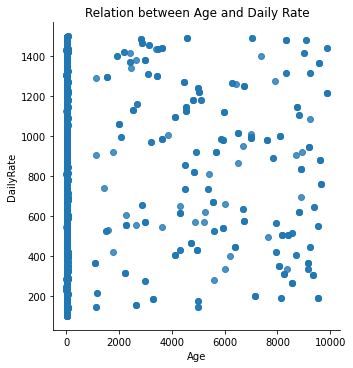

In [6]:
sns.lmplot(x='Age', y='DailyRate', data=df, fit_reg=False).set(title='Relation between Age and Daily Rate')

This plot confirms that column Age contain outliers.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4449 entries, 0 to 4448
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeNumber            4449 non-null   int64  
 1   Age                       4449 non-null   float64
 2   BusinessTravel            4449 non-null   object 
 3   DailyRate                 4449 non-null   float64
 4   Department                4449 non-null   object 
 5   DistanceFromHome          4449 non-null   float64
 6   Education                 4449 non-null   float64
 7   EducationField            4449 non-null   object 
 8   EmployeeCount             4449 non-null   float64
 9   EnvironmentSatisfaction   4449 non-null   float64
 10  Gender                    4449 non-null   object 
 11  HourlyRate                4449 non-null   float64
 12  JobInvolvement            4449 non-null   float64
 13  JobLevel                  4449 non-null   float64
 14  JobRole 

In [8]:
#checking if monthly income in particular job roles is possible
df.groupby('JobRole').max().MonthlyIncome 

JobRole
Healthcare Representative    13966.0
Human Resources              10725.0
Laboratory Technician         7403.0
Manager                      19999.0
Manufacturing Director       13973.0
Research Director            19973.0
Research Scientist            9724.0
Sales Executive              13872.0
Sales Representative          6632.0
Name: MonthlyIncome, dtype: float64

In [9]:
#checking categorical features
df_cat = df.select_dtypes(include=['object'])
df_cat.describe()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime,Attrition
count,4449,4449,4449,4449,4449,4449,4449,4449,4302
unique,3,3,6,2,9,3,1,2,2
top,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No,Yes
freq,3147,2916,1823,2681,983,2074,4449,3186,2222


In [10]:
#listing unique values in categorical columns
for column in df_cat.columns:
    print(df_cat[column].unique())

['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
['Research & Development' 'Human Resources' 'Sales']
['Life Sciences' 'Medical' 'Other' 'Technical Degree' 'Marketing'
 'Human Resources']
['Male' 'Female']
['Laboratory Technician' 'Manufacturing Director' 'Research Scientist'
 'Human Resources' 'Research Director' 'Sales Representative' 'Manager'
 'Healthcare Representative' 'Sales Executive']
['Married' 'Single' 'Divorced']
['Y']
['Yes' 'No']
['No' 'Yes' nan]


In [11]:
#it seems that dataset is relatively good balanced
df.groupby('Attrition')['Attrition'].count()

Attrition
No     2080
Yes    2222
Name: Attrition, dtype: int64

In [12]:
#removing nans and redundant columns, dropping duplicates
df.dropna(inplace=True)
df.drop(['EmployeeNumber', 'Over18', 'StandardHours', 'EmployeeCount'], axis=1, inplace = True)
df = df.drop_duplicates().reset_index(drop=True)

In [13]:
#replacing binary, categorical features to 0 and 1
df.Gender.replace(['Male','Female'],[1,0], inplace=True)
df.OverTime.replace(['Yes','No'],[1,0], inplace=True)
df.Attrition.replace(['Yes','No'],[1,0], inplace=True)

df['Gender'] = df['Gender'].astype('uint8')
df['OverTime'] = df['OverTime'].astype('uint8')
df['Attrition'] = df['Attrition'].astype('uint8')

In [14]:
#one hot encoding for the rest of the categorical columns
cat_columns = df.select_dtypes(include=['object']).columns.tolist()
df = pd.get_dummies(df, columns = cat_columns)
df.tail()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
3060,41.0,582.0,28.0,4.0,1.0,0,60.0,2.0,4.0,2.0,...,0,0,1,0,0,0,0,0,1,0
3061,42.0,1396.0,6.0,3.0,3.0,1,83.0,3.0,3.0,1.0,...,0,0,0,1,0,0,0,0,1,0
3062,42.0,1396.0,6.0,3.0,3.0,1,83.0,3.0,3.0,1.0,...,0,0,0,1,0,0,0,0,1,0
3063,8823.0,621.0,15.0,3.0,1.0,0,73.0,3.0,3.0,4.0,...,0,0,0,0,0,0,0,0,1,0
3064,44.0,381.0,918785.0,3.0,1.0,1,49.0,1.0,1.0,3.0,...,1,0,0,0,0,0,0,0,0,1


In [15]:
#changing outliers to median in a given column
df['Age'].where(df['Age'] <= 65, df['Age'].median(), inplace=True)
df['DistanceFromHome'].where(df['DistanceFromHome'] <= 100, df['DistanceFromHome'].median(), inplace=True)
df['TotalWorkingYears'].where(df['TotalWorkingYears'] <= 47, df['TotalWorkingYears'].median(), inplace=True)
df['YearsAtCompany'].where(df['YearsAtCompany'] <= 47, df['YearsAtCompany'].median(), inplace=True)
df['YearsInCurrentRole'].where(df['YearsInCurrentRole'] <= 47, df['YearsInCurrentRole'].median(), inplace=True)
df['YearsSinceLastPromotion'].where(df['YearsSinceLastPromotion'] <= 47, df['YearsSinceLastPromotion'].median(), inplace=True)
df['YearsWithCurrManager'].where(df['YearsWithCurrManager'] <= 47, df['YearsWithCurrManager'].median(), inplace=True)


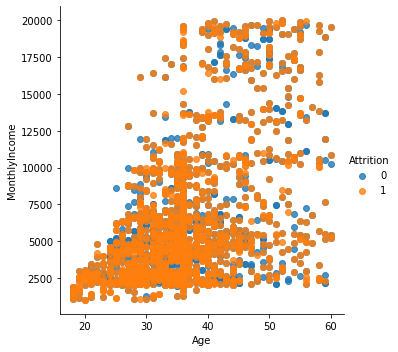

In [16]:
sns.lmplot(x='Age', y='MonthlyIncome', data=df, fit_reg=False, hue='Attrition')

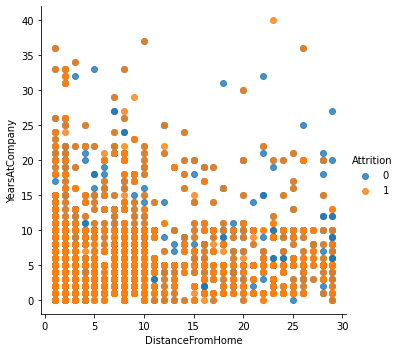

In [17]:
sns.lmplot(x='DistanceFromHome', y='YearsAtCompany', data=df, fit_reg=False, hue='Attrition')

<AxesSubplot:xlabel='Age', ylabel='Count'>

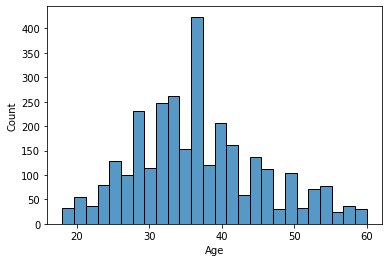

In [18]:
sns.histplot(x='Age', data=df, )

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Count'>

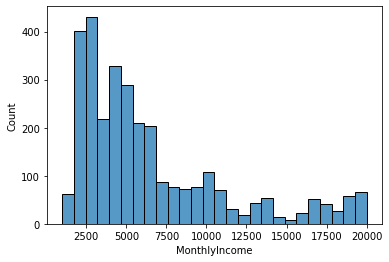

In [19]:
sns.histplot(x='MonthlyIncome', data=df, )

<AxesSubplot:xlabel='YearsInCurrentRole'>

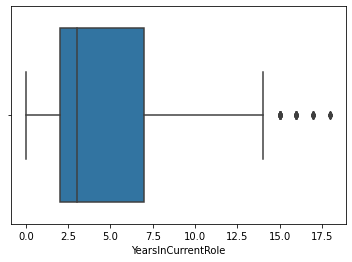

In [20]:
sns.boxplot( x='YearsInCurrentRole', data=df, )

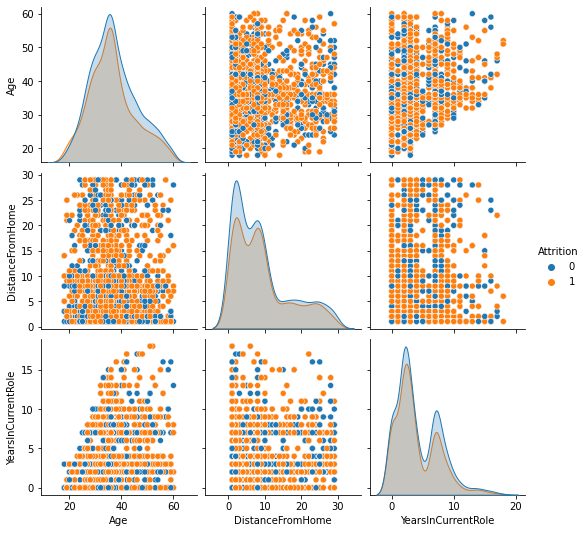

In [21]:
sns.pairplot(df, vars=['Age','DistanceFromHome', 'YearsInCurrentRole'], hue='Attrition')

In [22]:
#after the cleaning dataset is less balanced
df.groupby('Attrition')['Attrition'].count()

Attrition
0    1672
1    1393
Name: Attrition, dtype: int64

In [23]:
y = df['Attrition'].values
X = df.drop(['Attrition'], axis=1)

In [25]:
#using recursive feature elimination to find best features
model = DecisionTreeClassifier()
rfe = RFE(estimator= model,n_features_to_select=5,step=1)
cols = X.iloc[:,rfe.fit(X, y).support_].columns
print(cols)

Index(['DailyRate', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate',
       'TotalWorkingYears'],
      dtype='object')


<AxesSubplot:>

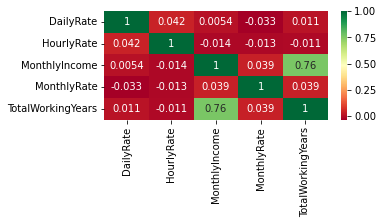

In [26]:
# counting correlation between features chosen by RFE
count_corr=df[cols].corr()

# correlation heatmap
plt.figure(figsize=(5,2))
sns.heatmap(count_corr, cmap= 'RdYlGn',annot=True)

In [27]:
#function to calculate metrics for model
def calculate_metrics (X_train, X_test, y_train, y_test, model):
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)

    F1_train = f1_score(y_train, y_pred_train)
    F1_test = f1_score(y_test, y_pred_test)

    recall_train = recall_score(y_train, y_pred_train)
    recall_test = recall_score(y_test, y_pred_test)
    wyniki = pd.DataFrame({'Accuracy':[acc_train, acc_test],
                      'F1':[F1_train, F1_test],
                      'Recall':[recall_train, recall_test]})
    wyniki.index=['train', 'test']
    return  wyniki

In [30]:
# choosing train and test set with stratified crossvalidation

cv = RepeatedStratifiedKFold(n_splits=30, n_repeats=20, random_state=42)
for train_index, test_index in cv.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
 
#classification models
#logistic regression
lr = LogisticRegression(max_iter=100000, random_state=42)
lr.fit(X_train, y_train)

print(calculate_metrics (X_train, X_test, y_train, y_test, lr))

#decision tree
clf = DecisionTreeClassifier(min_samples_split=15)
clf.fit(X_train, y_train)

print(calculate_metrics (X_train, X_test, y_train, y_test, clf))

#knn

knn = KNeighborsClassifier(n_neighbors=5, metric='chebyshev')
knn.fit(X_train, y_train)

print(calculate_metrics (X_train, X_test, y_train, y_test, knn))

#svm
svm = SVC()
svm.fit(X_train,y_train)

print(calculate_metrics (X_train, X_test, y_train, y_test, svm))

# random forest
rfc = RandomForestClassifier(max_depth=60)
rfc.fit(X_train, y_train)
print(calculate_metrics (X_train, X_test, y_train, y_test, rfc))

       Accuracy        F1    Recall
train  0.547081  0.023290  0.011887
test   0.539216  0.040816  0.021277
       Accuracy        F1    Recall
train  0.659129  0.531974  0.426449
test   0.284314  0.141176  0.127660
       Accuracy        F1    Recall
train  0.621330  0.515544  0.443536
test   0.352941  0.232558  0.212766
       Accuracy   F1  Recall
train  0.545731  0.0     0.0
test   0.539216  0.0     0.0
       Accuracy        F1    Recall
train  0.665204  0.588040  0.526003
test   0.235294  0.133333  0.127660


In [31]:
#same models for features selected by RFE
X = X[cols]
# choosing train and test set with stratified crossvalidation
cv = RepeatedStratifiedKFold(n_splits=20, n_repeats=10, random_state=42)
for train_index, test_index in cv.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
#classification models
#logistic regression
lr = LogisticRegression(max_iter=100000, random_state=42)
lr.fit(X_train, y_train)

print(calculate_metrics (X_train, X_test, y_train, y_test, lr))

#decision tree
clf = DecisionTreeClassifier(min_samples_split=5)
clf.fit(X_train, y_train)

print(calculate_metrics (X_train, X_test, y_train, y_test, clf))

#knn
knn = KNeighborsClassifier(n_neighbors=7, metric='chebyshev')
knn.fit(X_train, y_train)

print(calculate_metrics (X_train, X_test, y_train, y_test, knn))

#svm
svm = SVC()
svm.fit(X_train,y_train)

print(calculate_metrics (X_train, X_test, y_train, y_test, svm))

# random forest
rfc = RandomForestClassifier(max_depth=60)
rfc.fit(X_train, y_train)
print(calculate_metrics (X_train, X_test, y_train, y_test, rfc))


       Accuracy       F1   Recall
train  0.547047  0.01787  0.00907
test   0.542484  0.00000  0.00000
       Accuracy        F1    Recall
train  0.668956  0.471491  0.325019
test   0.307190  0.145161  0.128571
       Accuracy        F1    Recall
train  0.610920  0.487562  0.407407
test   0.392157  0.218487  0.185714
       Accuracy   F1  Recall
train  0.545673  0.0     0.0
test   0.542484  0.0     0.0
       Accuracy        F1    Recall
train  0.668956  0.606209  0.560847
test   0.235294  0.133333  0.128571


In [33]:
#undersampling
shuffled_df = df.sample(frac=1,random_state=4)
attri_df = shuffled_df.loc[shuffled_df['Attrition'] == 1]
no_attri_df = shuffled_df.loc[shuffled_df['Attrition'] == 0].sample(n=1393,random_state=42)
normalized_df = pd.concat([attri_df, no_attri_df])

In [34]:
# choosing train and test set with stratified crossvalidation
y = normalized_df['Attrition'].values
X = normalized_df.drop(['Attrition'], axis=1)
cv = RepeatedStratifiedKFold(n_splits=30, n_repeats=20, random_state=42)
for train_index, test_index in cv.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
 
#classification models
#logistic regression
lr = LogisticRegression(max_iter=100000, random_state=42)
lr.fit(X_train, y_train)

print(calculate_metrics (X_train, X_test, y_train, y_test, lr))

#decision tree
clf = DecisionTreeClassifier(min_samples_split=15)
clf.fit(X_train, y_train)

print(calculate_metrics (X_train, X_test, y_train, y_test, clf))

#knn

knn = KNeighborsClassifier(n_neighbors=5, metric='chebyshev')
knn.fit(X_train, y_train)

print(calculate_metrics (X_train, X_test, y_train, y_test, knn))

#svm
svm = SVC()
svm.fit(X_train,y_train)

print(calculate_metrics (X_train, X_test, y_train, y_test, svm))

# random forest
rfc = RandomForestClassifier(max_depth=60)
rfc.fit(X_train, y_train)
print(calculate_metrics (X_train, X_test, y_train, y_test, rfc))

       Accuracy        F1    Recall
train  0.507795  0.476717  0.448404
test   0.478261  0.400000  0.347826
       Accuracy        F1    Recall
train  0.724202  0.696858  0.634001
test   0.326087  0.295455  0.282609
       Accuracy        F1    Recall
train  0.624350  0.643913  0.679287
test   0.423913  0.475248  0.521739
       Accuracy        F1    Recall
train  0.521901  0.448158  0.388270
test   0.467391  0.409639  0.369565
       Accuracy        F1    Recall
train  0.777654  0.775066  0.766147
test   0.260870  0.291667  0.304348


The project is still ongoing, because I didn't get correct model so far.
Things to do/correct:
- try different method for handling outliers
- select features for model in a different way
- tuning hyperparameters for best models for this dataset -> first choice will be decision tree, random forest and SVM